In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Ensuring consistent and professional style
# plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)

import sys, os

In [3]:
crop_yields = pd.read_csv("/app/data/00-raw/FAOSTAT/FAOSTAT_data_en_4-19-2024.csv")  

In [4]:
crop_yields = crop_yields[crop_yields.Element == "Production"]
crop_yields = crop_yields[crop_yields.Year == 2021]
crop_yields = crop_yields[["Area", "Item", "Value"]]

/tmp/ipykernel_35540/3315379430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crop_yields['Value'].fillna(0, inplace=True)


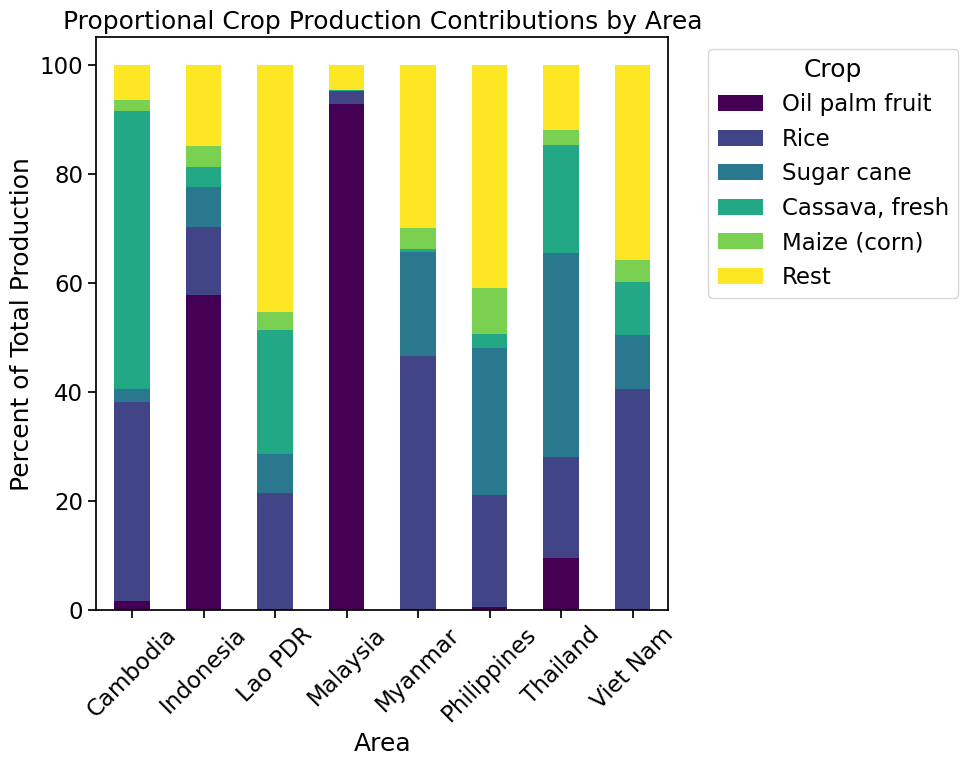

In [6]:
# Replace NaN values with 0
crop_yields['Value'].fillna(0, inplace=True)

# Group by Area and Item and summing the values
area_item_total = crop_yields.groupby(['Area', 'Item'])['Value'].sum().unstack()

# Identify the top 5 items based on their total yield across all areas
top_items = area_item_total.sum().nlargest(5).index.tolist()

# Filter to include only top 5 items and aggregate the rest into a new category 'Rest'
area_item_total['Rest'] = area_item_total.drop(columns=top_items).sum(axis=1)
area_item_total = area_item_total[top_items + ['Rest']]

# Normalize the values so each area sums to 100
area_percentages = area_item_total.div(area_item_total.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
area_percentages.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
ax.set_ylabel('Percent of Total Production')
ax.set_title('Proportional Crop Production Contributions by Area')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customizing the legend and labels
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for legend
plt.savefig("/app/data/03-results/pics/crop_prod_SE_asia.jpg", bbox_inches="tight", dpi=300)
plt.show()

             index            Area         Value
0                8           World  7.764615e+08
1   Southeast Asia  Southeast Asia  1.938384e+08
2                1       Indonesia  5.474898e+07
3                7        Viet Nam  4.267234e+07
4                2         Lao PDR  3.594800e+06
5                4         Myanmar  2.468020e+07
6                3        Malaysia  2.364453e+06
7                0        Cambodia  1.162400e+07
8                6        Thailand  3.431703e+07
9                5     Philippines  1.975639e+07
10               9           other  8.020000e+04


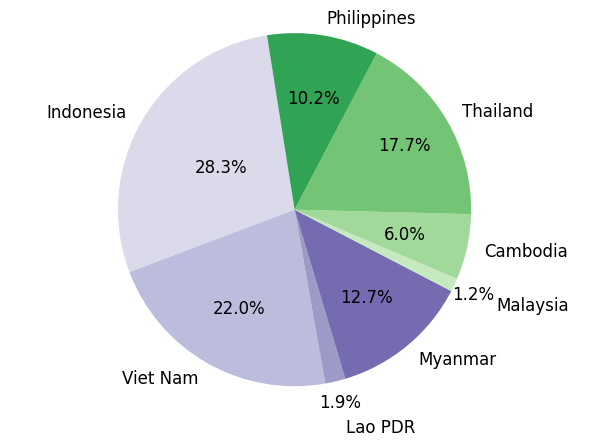

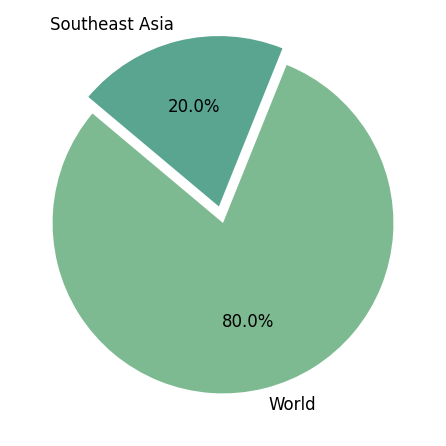

In [8]:
df =  pd.read_csv(os.path.join('/app/data/00-raw', "FAOSTAT", 'rice_SEAsia.csv'), sep=',')

# Group all countries with small values
df.loc[df['Value'] < 2000000, 'Area'] = 'other'
# df.loc[df['Area'].isin(["Cambodia", "Lao People's Democratic Republic"]), 'Area'] = 'other'
df = df.groupby('Area')['Value'].sum().reset_index()

# Sum up all SEAsia
df.loc['Southeast Asia',"Area"]='Southeast Asia'
df = df.sort_values(by="Value", ascending=False)
df.loc['Southeast Asia',"Value"] = df['Value'][1:].sum()
df = df.sort_values(by="Value", ascending=False).reset_index()

# Reindex for better position
df.iloc[4], df.iloc[8] = df.iloc[8], df.iloc[4]
df.iloc[6], df.iloc[9] = df.iloc[9], df.iloc[6]
print(df)
cmap = plt.get_cmap("tab20c_r")

w,l,p = plt.pie(df["Value"][2:-1], labels=df["Area"][2:-1], # skip last 'other' row
                autopct='%1.1f%%', startangle=99,
                colors=cmap(np.arange(4,12)),
                pctdistance=0.8,
                textprops={'fontsize':12})

pctdists = [.6, .8, 1.4, .8, 1.4, .8, .9, 0.8,1.4]
for t,d in zip(p, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))

labeldists = [1, 1, 1.15, 1, 1.15, 1, 1,1,1.15]
for t,d in zip(l, labeldists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))
    
plt.axis('equal')
plt.tight_layout()
plt.savefig("/app/data/03-results/pics/rice_sea.jpg", bbox_inches="tight", dpi=500)
plt.show()

plt.pie(df["Value"][:2], labels=df["Area"][:2],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("crest"),
        textprops={'fontsize':12},
        explode=(0, 0.1)
)
# plt.title("Rice production of\n"+"countries in 2022 Summer Olympics")
plt.tight_layout()
plt.savefig("/app/data/03-results/pics/rice_world.jpg", bbox_inches="tight", dpi=500)
plt.show()
